# 창시구

인스타그램 콘텐츠 방식에 따른 고객 인식 변화 확인

- [] 데이터 크롤링 (~4/15) 

- [] 데이터 전처리 (~4/30: 기본적언 전처리 및 토픽 모델링과 sentiment analysis를 통한 feature 생성) 

> 텍스트 마이닝을 통한 토픽 모델링

> sentiment analysis

> dynamic network analysis (추가)

> time-seies analysis (추가)

- [] 가설 검정 (~5/10) 

- [] 전략적 제언 수립 

# "인스타그램에서 기업이 제공하는 콘텐츠의 형태는 소비자들에게 각기 다른 감정을 유도하며 이는 소비자들의 기업에 대한 행동으로 이루어진다."

***

## 데이터 

> 인스타그램 4월 12일까지의 2018년 호텔 산업 top 50개의 brand 중 미국 브랜드이며 인스타그램의 피드 숫자가 50개 이상인 기업 4곳 

## 데이터 분석을 위한 셋 

* 궁극적으로 각 포스트엣의 활동 기반 개인의 결정 그리고 디지털 상에서의 행동이 달라지는 것이기에 그에 맞는 데이터셋 구축이 필요합니다.

## 셋의 구성 요소 
___ 

* 마케팅 컨텐츠의 형태에 대한 구분, 소비자들이 느끼는 감정에 대한 데이터 정보 생성, 소비자 행동에 대한 데이터 정보 생성



## 마케팅 컨텐츠 형태 특성 
___ 

*  마케팅 sales funnel 중 인지의 단계에 속하게 되며 소비자들이 보게될 기업의 컨텐츠를 의미합니다.    
*  기업의 마케팅 팀들은 인스타그램을 통해서 어떻게 하면 사람들의 이목을 끌 수 있을까라고 생각을 하기에 좋은 컨텐츠의 생성은 검색 후 사람들의 기업에 대한 행동을 유도할 수 있습니다. 
*  <img src= "mgc_ugc.jpeg" style = "height: 200px">
*  우선 저는 마케팅 컨텐츠의 형태를 photo by @__ 가 들어간 경우에는 user-generated content 그렇지 않은 경우에는 marketer-generated content라고 가정하였습니다.(전처리 1)

## 소비자들이 느끼는 감정에 대한 데이터 정보 생성
___ 

* 마케팅 sales funnel 중 관심의 단계로 고객들이 마케터가 올린 컨텐츠에서 어떤 가치를 느끼게 될 경우 그 다음 단계로 갈 수 있습니다.   
* 인스타그램에서 가치를 느끼게 된 경우 사람들은 피드에서 다른 사람들이 소통한 것을 확인하게 되고 그를 통해서 피드의 내용에 대한 개인적인 판단을 마칩니다.    
* 소비자들이 댓글들을 보고 느끼게 될 감정을 파악하기 위해 우선 저는 댓글 전체에서 공통적으로 공유되고 있는 sentiment에 대한 비율을 확인하고자 합니다. (전처리 2)   
* 또한 본래 가지고 있었던 정보가 아닌 새로운 시각을 높여주는 정보의 경우 그것이 sentiment에 어떤 영향을 미치는지 확인할 예정입니다(moderation이 될 수 있습니다) 
* 우선 기본적으로는 sentiment analysis를 사용할 예정입니다. sentiment analysis에서 sentence를 compound, negative, neutral, positive로 나눠서 분석을 해주는 algorithmia를 사용해보도록 하겠습니다.(전처리3) 그리고 그 전에 각 sentence의 주제가 될 수 있는 단어를 나타내주는 모델인 LDA를 통해서 label별 감정 분석을 해보겠습니다.(전처리4) 

참고자료: https://algorithmia.com/blog/sentiment-analysis-with-twitter
 

## 소비자 행동에 대한 데이터 정보 생성 (Customer relationship) 
___

* 마케팅 sales funnel 중 결정의 단계로 피드에 대한 내용이 개인의 가치와 부합하다고 생각하고 이에 대해 더 알아보고 싶은 소비자일 경우 like를 누르거나 commment를 남김으로써 기업과 관계를 이어 나가고자 할 것입니다. business 계정일 경우 실제 저장을 했는지 안했는지를 통해서 확인할 수 있지만 저희는 가지고 있지 않기 때문에 like나 comment의 수를 customer relationship을 나타내는 변수로 사용하겠습니다.


## Control variables 
___ 

* 이 데이터를 만들 때, 우리가 통제 변수로 고려해야할 것은 company의 star rating, feed를 시작한 날짜, 관찰 기간 등이 존재합니다. (생각날 때마다 계속 update) 

## 활용성 제안 
___ 


In [37]:
import pandas as pd 
import seaborn as sns 
import numpy as np 
import matplotlib.pyplot as plt
from sklearn.preprocessing import QuantileTransformer# quantile 별로 나눠서 normalize
from sklearn.preprocessing import normalize# 그냥 normalize

import numpy as np
import warnings 
warnings.filterwarnings(action="ignore",category=DeprecationWarning)


In [134]:
def read_data():
    hyatt= pd.read_csv("hyatt",index_col=[0])
    hilton=pd.read_csv("hilton_post",index_col=[0])
    holiday=pd.read_csv("holiday_inn",index_col=[0])
    wyndham=pd.read_csv("wyndham",index_col=[0])
    
    return (hilton,hyatt,holiday,wyndham)
hilton,hyatt,holiday,wyndham=read_data()
hilton.head()

,caption,id,profile,type,caption_and_hashtags,is_video,view_count,video_duration,likes,comments,com_list,caption_tag,real_ugc
date,,,,,,,,,,,,,
2020-04-09 16:33:28,"Over the past few weeks, we’ve gotten lots of ...",1,hilton,GraphVideo,[],True,1730.0,30.3,194,29,"[['❤️❤️❤️', 0, '<Profile allpurple10 (31050709...",['@doubletree)'],False
2020-04-06 12:37:22,One million ‘thank-yous’ to the frontline medi...,2,hilton,GraphImage,['hotelsforheroes'],False,NaN,NaN,412,19,"[['This is awesome!!!👏👏👏', 0, '<Profile allpur...",['@AmericanExpress'],False
2020-04-03 15:31:01,We’re joining with hotels across the world to ...,3,hilton,GraphSidecar,['hope'],False,NaN,NaN,418,7,"[['Build with immortal love 👑', 0, '<Profile l...",[],False
2020-03-11 15:54:11,We tend to lose track of things during a stay ...,4,hilton,GraphImage,[],False,NaN,NaN,98,1,[['.\n.\n.\n.\n#staugustine #staugustinefl #st...,['@embassysuitesstaugustinebeach:'],False
2020-03-09 18:02:10,"From Lake Boca to the beach, @bocaresort will ...",5,hilton,GraphImage,[],False,NaN,NaN,227,7,[['.\n.\n.\n.\n#boca #bocaraton #resortlife #e...,['@bocaresort'],False


##  ugc에 따른 like와 comment 개수의 변화 확인
___ 

각 회사에서 real_ugc에 따른 like와 comment의 분포를 확인

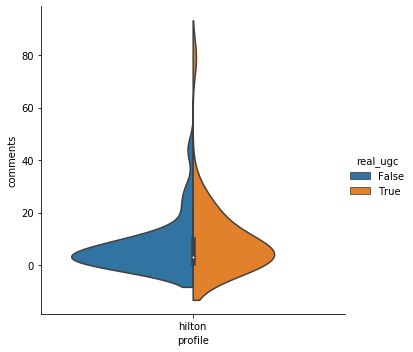

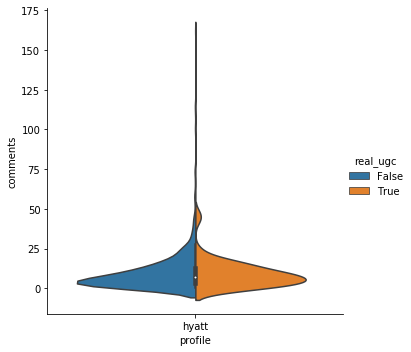

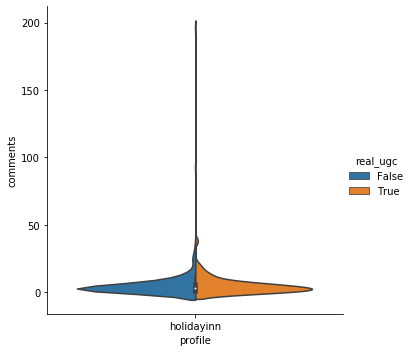

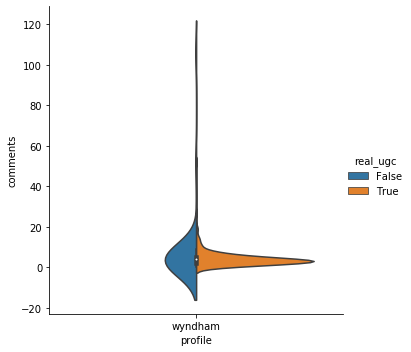

In [6]:
g0=sns.catplot(kind="violin",x="profile",y="comments",hue="real_ugc",data=hilton,split=True)
g1=sns.catplot(kind="violin",x="profile",y="comments",hue="real_ugc",data=hyatt,split=True)
g2=sns.catplot(kind="violin",x="profile",y="comments",hue="real_ugc",data=holiday,split=True)
g3=sns.catplot(kind="violin",x="profile",y="comments",hue="real_ugc",data=wyndham,split=True)

In [8]:
hilton.likes.describe()

count       69.00000
mean      3025.15942
std       7476.12859
min         76.00000
25%        146.00000
50%        323.00000
75%       1488.00000
max      40295.00000
Name: likes, dtype: float64

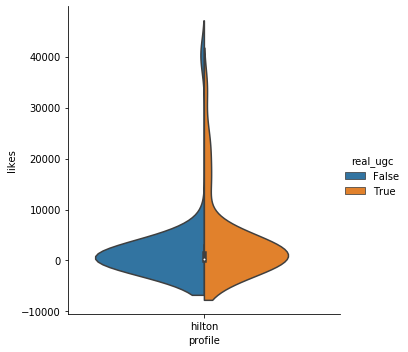

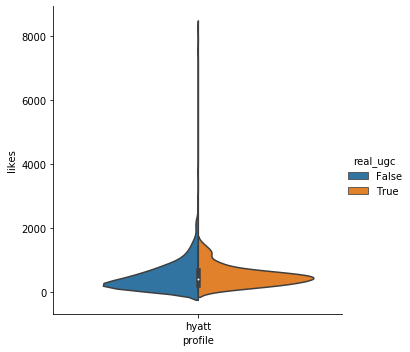

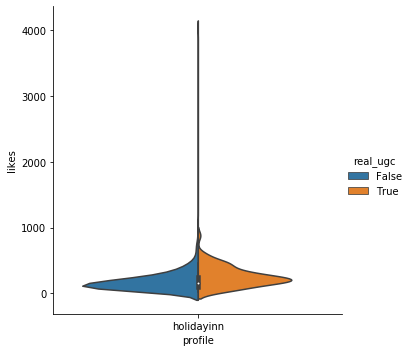

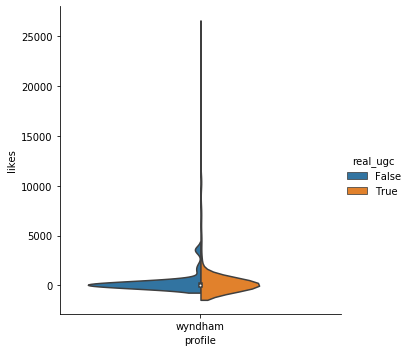

In [10]:
g0=sns.catplot(kind="violin",x="profile",y="likes",hue="real_ugc",data=hilton,split=True)
g1=sns.catplot(kind="violin",x="profile",y="likes",hue="real_ugc",data=hyatt,split=True)
g2=sns.catplot(kind="violin",x="profile",y="likes",hue="real_ugc",data=holiday,split=True)
g3=sns.catplot(kind="violin",x="profile",y="likes",hue="real_ugc",data=wyndham,split=True)

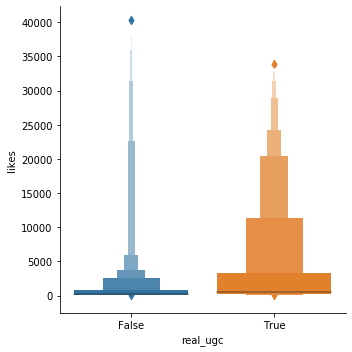

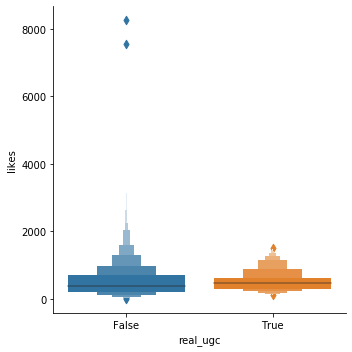

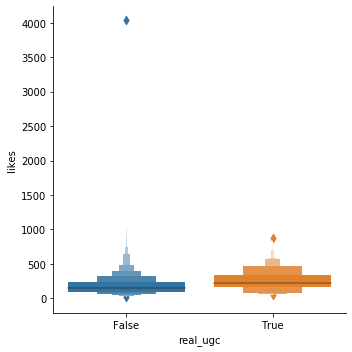

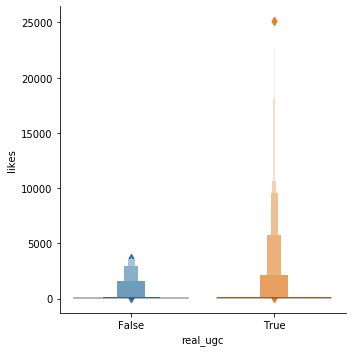

In [12]:
g0=sns.catplot(data=hilton,kind="boxen",x="real_ugc",y="likes")
g1=sns.catplot(data=hyatt,kind="boxen",x="real_ugc",y="likes")
g2=sns.catplot(data=holiday,kind="boxen",x="real_ugc",y="likes")
g3=sns.catplot(data=wyndham,kind="boxen",x="real_ugc",y="likes")

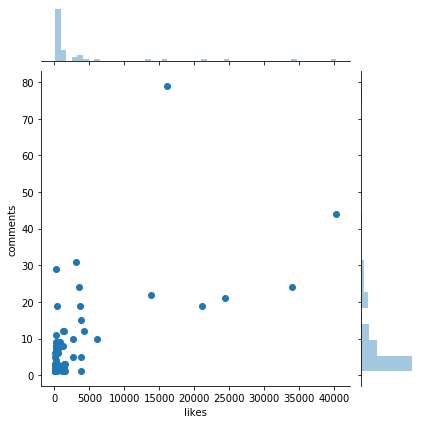

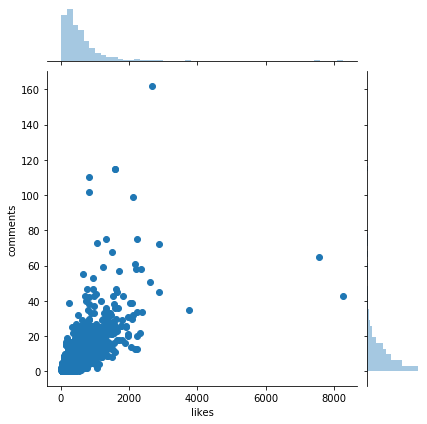

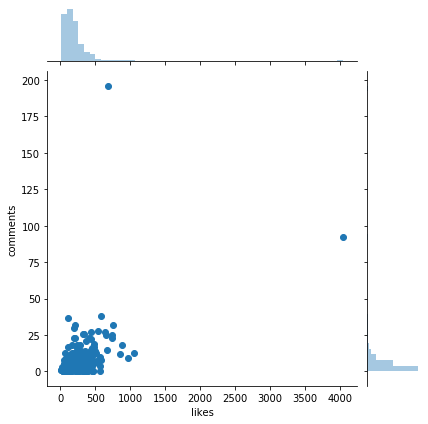

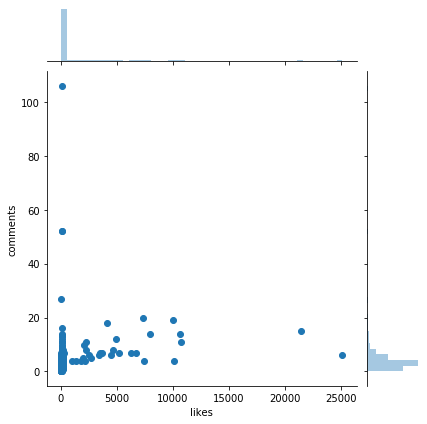

In [22]:
for i in [hilton,hyatt,holiday,wyndham]:
#     print(i['likes'].describe())
    g=sns.jointplot(x='likes',y="comments",kind="scatter",data=i)

기본적으로 값들이 다 한쪽으로 치우쳐져 있는 데이터들이기에 normalize를 해줍니다.

normalized 관계 

the correlation between hilton [[1.         0.62957138]
 [0.62957138 1.        ]]
the correlation between hyatt [[1.         0.63580907]
 [0.63580907 1.        ]]
the correlation between holidayinn [[1.         0.52139142]
 [0.52139142 1.        ]]
the correlation between wyndham [[1.         0.16223891]
 [0.16223891 1.        ]]


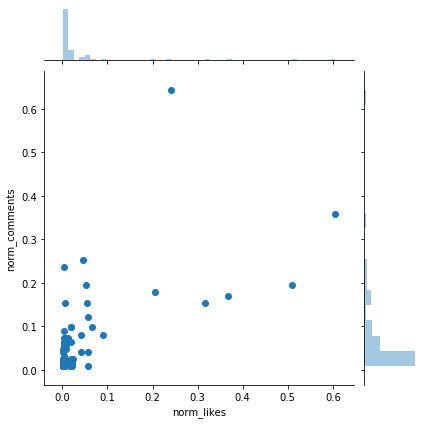

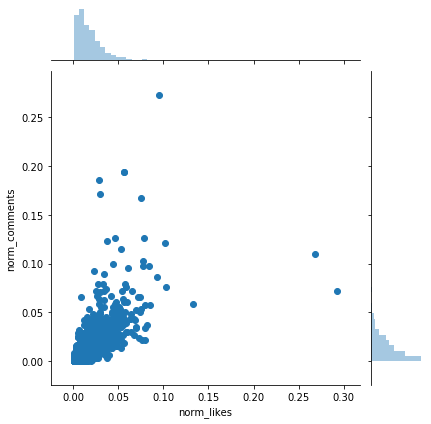

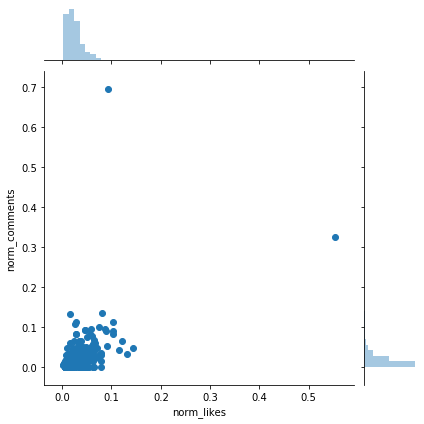

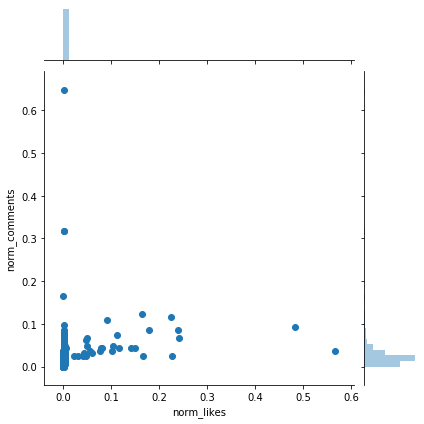

In [47]:

for i in [hilton,hyatt,holiday,wyndham]:
    i['norm_likes']=normalize(i[['likes']],norm='l2',axis=0)
    i['norm_comments']=normalize(i[['comments']],norm='l2',axis=0)
    print("the correlation between {}".format(i.profile[0]),np.corrcoef(i['norm_likes'].values,i['norm_comments'].values))
    
    g=sns.jointplot(x='norm_likes',y="norm_comments",kind="scatter",data=i)
    

normalize한 결과 hyatt의 경우 comment의 개수와 like의 normalized 된 개수는 50% 이상의 상관관계를 보였지만 wyndham의 경우 16%로 거의 상관 없음을 보였다.

ugc인 경우와 ugc가 아닌 경우의 likes와 comments의 개수 사이에 histogram을 그려 두 집단 간에 유의미한 차이가 나는지 확인을 해보겠습니다.

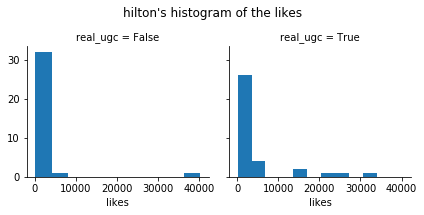

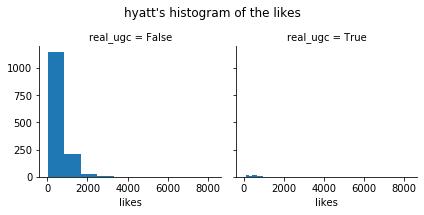

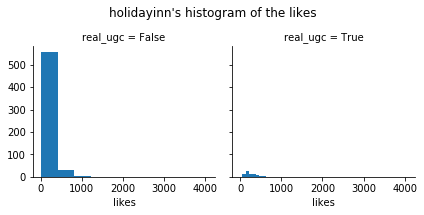

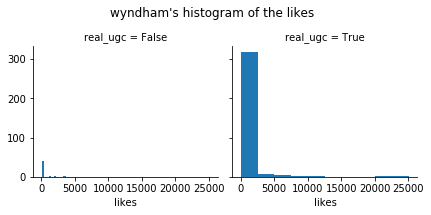

In [64]:
# ugc&likes
for i in [hilton,hyatt,holiday,wyndham]:
    
    g=sns.FacetGrid(i,col="real_ugc")# ugc
    g=g.map(plt.hist,"likes")
    plt.subplots_adjust(top=0.8)
    g=g.fig.suptitle("{}'s histogram of the likes".format(i.profile[0]))

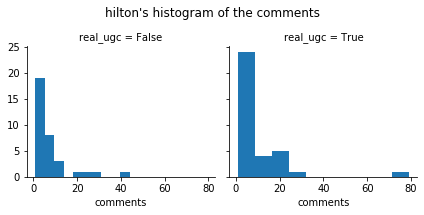

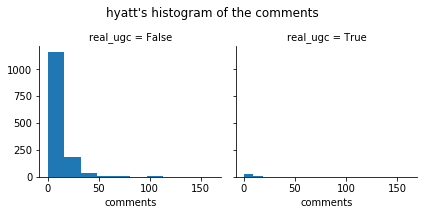

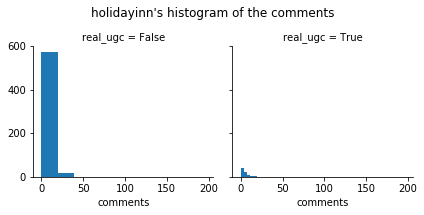

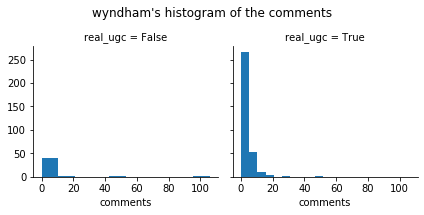

In [66]:
# ugc&comments
for i in [hilton,hyatt,holiday,wyndham]:
    
    g=sns.FacetGrid(i,col="real_ugc")# ugc
    g=g.map(plt.hist,"comments")
    plt.subplots_adjust(top=0.8)
    g=g.fig.suptitle("{}'s histogram of the comments".format(i.profile[0]))

이렇게 해서는 눈에 띄는 차이가 보이지 않습니다. 시간의 변화에 따른 두 집단의 차이를 확인해봅니다.

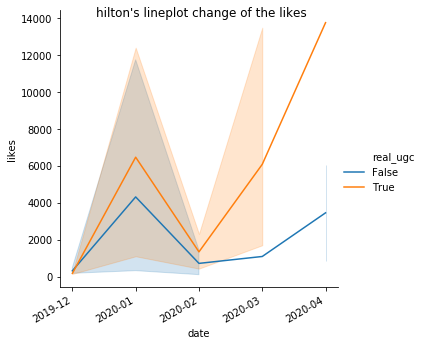

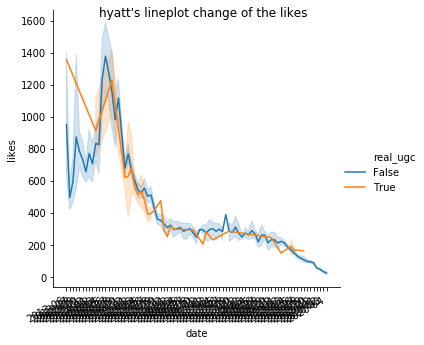

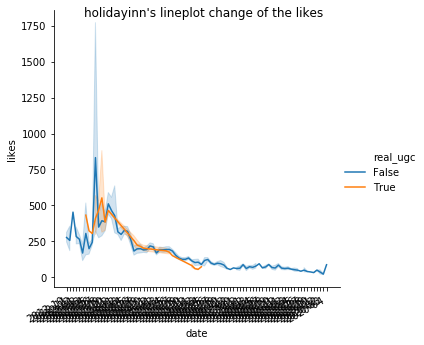

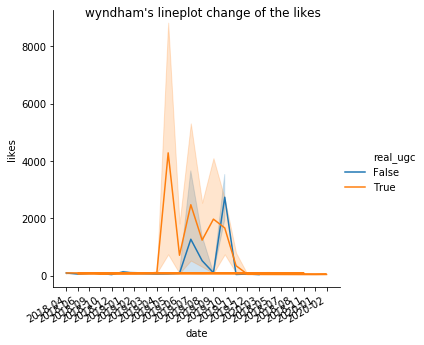

In [135]:
hilton,hyatt,holiday,wyndham=read_data()

for i in [hilton,hyatt,holiday,wyndham]:
    i['date']=i.index
    i['date']=pd.to_datetime(i['date'])
    i['date']=i['date'].map(lambda x: x.strftime('%Y-%m-%d'))
    i.index=range(len(i))
    i['date']=i['date'].sort_values(ascending=True).reset_index(drop=True)
    
    g=sns.relplot(kind="line",x="date",y="likes",hue="real_ugc",data=i)
    g.fig.autofmt_xdate()
    g.fig.suptitle("{}'s lineplot change of the likes".format(i.profile[0]))
    plt.show()

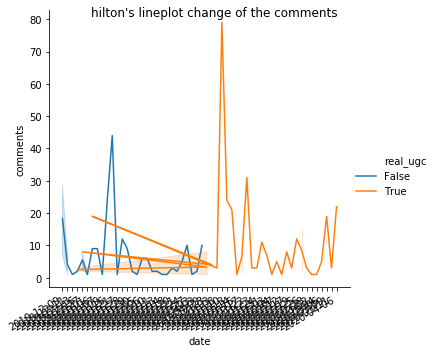

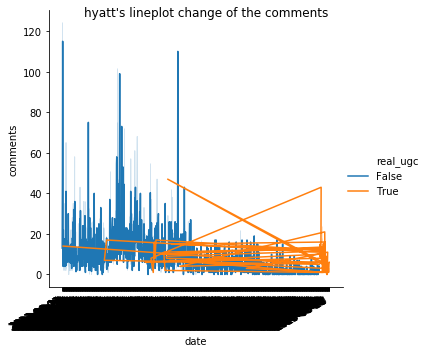

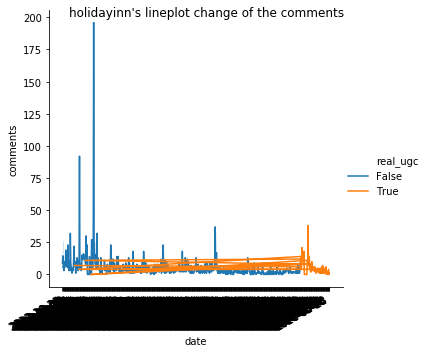

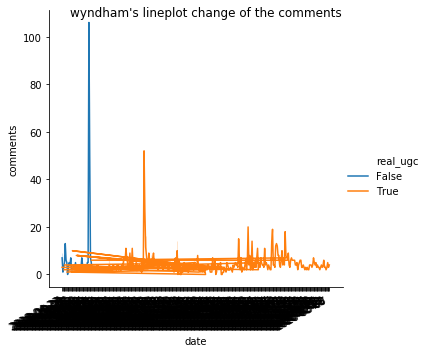

In [139]:
# ugc and comment
hilton,hyatt,holiday,wyndham=read_data()

for i in [hilton,hyatt,holiday,wyndham]:
    i['date']=i.index
    i['date']=pd.to_datetime(i['date'])
    i['date']=i['date'].map(lambda x: x.strftime('%Y-%m-%d'))
    i.index=range(len(i))
    i['date']=i['date'].sort_values(ascending=True).reset_index(drop=True)
    
    g=sns.relplot(kind="line",x="date",y="comments",hue="real_ugc",data=i)
    g.fig.autofmt_xdate()
    g.fig.suptitle("{}'s lineplot change of the comments".format(i.profile[0]))
    plt.show()

In [142]:
wyndham['date'].value_counts()

2018-06-25    3
2018-07-02    3
2018-04-23    3
2019-06-09    2
2018-07-23    2
             ..
2018-06-04    1
2019-10-29    1
2018-10-25    1
2018-10-17    1
2019-09-26    1
Name: date, Length: 340, dtype: int64